In [113]:
import numpy as np
import matplotlib.pyplot as plt
import math

n = 56
minE = 0

E = []
Cf = []

dataX = []
dataY = []

f = open("LeastSquare.txt", "r")
for line in f:
    cut = line.replace("\n", "").split()
    dataX.append(float(cut[ 0 ]))
    dataY.append(float(cut[ 1 ]))
    
print(dataX)
print(dataY)

[0.2132, 0.2391, 0.2591, 0.3443, 0.3751, 0.4534, 0.6019, 0.6515, 0.6724, 0.7522, 0.7585, 0.7929, 0.8517, 0.882, 0.9724, 1.1257, 1.1458, 1.3177, 1.331, 1.521, 1.5942, 1.6864, 1.6962, 1.879, 1.9275, 2.1155, 2.2563, 2.3059, 2.4638, 2.5408, 2.5796, 2.6237, 2.8082, 2.9439, 3.02, 3.1667, 3.3461, 3.4841, 3.6496, 3.7354, 3.8194, 3.847, 3.9516, 4.0427, 4.0483, 4.0736, 4.1431, 4.2782, 4.3983, 4.5914, 4.6689, 4.7801, 4.9574, 4.9671, 5.162, 5.2454]
[3.218641, 3.109624, 3.020643, 2.602934, 2.439906, 2.008014, 1.175096, 0.908365, 0.799298, 0.406007, 0.376734, 0.222027, -0.020841, -0.134592, -0.424596, -0.739787, -0.764669, -0.833476, -0.828917, -0.641378, -0.522233, -0.350229, -0.331003, 0.034121, 0.126481, 0.42938, 0.576188, 0.609065, 0.648864, 0.635475, 0.621739, 0.601163, 0.474179, 0.363689, 0.305504, 0.217259, 0.175552, 0.202833, 0.299881, 0.372153, 0.452646, 0.480486, 0.588571, 0.68115, 0.686665, 0.71122, 0.774962, 0.877707, 0.939292, 0.97386, 0.967209, 0.941854, 0.879298, 0.87562, 0.811104, 0.

In [114]:
def Sum(forX, power):
    ans = 0.0
    for i in range(n):
        if forX == 1:
            ans += dataX[i]**power
        else:
            ans += dataY[i]*dataX[i]**power
    return ans

In [115]:
def GetY(X, degree, index):
    ans = X[0]
    for i in range(1, degree+1):
        ans += X[i]*dataX[index]**i
    return ans

In [124]:
for i in range(12, 13):
    A = np.zeros((i+1, i+1))
    B = np.zeros(i+1)
    
    for j in range(i+1):
        for k in range(i+1):
            A[j][k] = Sum(1, j+k)
            
    A[0][0] = n
    for j in range(i+1):
        B[j] = Sum(0, j)
        
    X = np.linalg.solve(A, B)
    print(A)
    print("\n")
    print(B)
    print("\n")
    print(X)
    np.save('A', A)
    np.save('B', B)

[[5.60000000e+01 1.38058300e+02 4.75537856e+02 1.87339475e+03
  7.88988725e+03 3.46015054e+04 1.56039263e+05 7.18472207e+05
  3.36262865e+06 1.59478841e+07 7.64718191e+07 3.70100535e+08
  1.80533728e+09]
 [1.38058300e+02 4.75537856e+02 1.87339475e+03 7.88988725e+03
  3.46015054e+04 1.56039263e+05 7.18472207e+05 3.36262865e+06
  1.59478841e+07 7.64718191e+07 3.70100535e+08 1.80533728e+09
  8.86604107e+09]
 [4.75537856e+02 1.87339475e+03 7.88988725e+03 3.46015054e+04
  1.56039263e+05 7.18472207e+05 3.36262865e+06 1.59478841e+07
  7.64718191e+07 3.70100535e+08 1.80533728e+09 8.86604107e+09
  4.37956937e+10]
 [1.87339475e+03 7.88988725e+03 3.46015054e+04 1.56039263e+05
  7.18472207e+05 3.36262865e+06 1.59478841e+07 7.64718191e+07
  3.70100535e+08 1.80533728e+09 8.86604107e+09 4.37956937e+10
  2.17434234e+11]
 [7.88988725e+03 3.46015054e+04 1.56039263e+05 7.18472207e+05
  3.36262865e+06 1.59478841e+07 7.64718191e+07 3.70100535e+08
  1.80533728e+09 8.86604107e+09 4.37956937e+10 2.17434234e+1

In [122]:
for i in range(1, n):
    A = np.zeros((i+1, i+1))
    B = np.zeros(i+1)
    
    for j in range(i+1):
        for k in range(i+1):
            A[j][k] = Sum(1, j+k)
            
    A[0][0] = n
    for j in range(i+1):
        B[j] = Sum(0, j)
        
    X = np.linalg.solve(A, B)
    # print(X)
    
    Cf.append(X)
    

    Err = 0.0
    for j in range(n):
        tmp = GetY(X, i, j) - dataY[j]
        Err += tmp**2
    
    E.append( math.sqrt(Err/(n-i)) )

    
for i in range(n-1):
    if E[i] < E[minE]:
        minE = i
    
print(E)
print(minE)
print(E[minE])
print(E[28])
print(E[29])

[0.9049487229754288, 0.7353115452162848, 0.5132422080881254, 0.3104144079558453, 0.2364999114549179, 0.1989099079057543, 0.040906463973330386, 0.041051902318633655, 0.004776131325464336, 0.004590647567327178, 0.0008674544598818683, 0.0006249966748741304, 0.000614712899841262, 0.000568221995528925, 0.0006349060889461723, 0.0001658657734182274, 0.0021475052802165944, 0.000246601727942595, 0.00046524739446934755, 0.00038502564093330485, 0.00020947390258645735, 0.00020037813196231228, 0.00012432694398775812, 0.010448929741198855, 0.000166449798051585, 0.00017692750612508402, 0.00011864378419550668, 0.00025630249688771297, 0.00030674351893742276, 0.0005515404368581931, 0.00020577680498594557, 0.00012030790142696722, 0.0001414851582724798, 0.00015687234166275173, 0.000623938480122517, 0.0004016198930416951, 0.00031774248928286795, 0.0005363363589764052, 0.0002353910819838961, 0.0009320001009637006, 0.00016156458834464048, 0.0009229982743214904, 0.0005560919035237327, 0.0002285270749024495, 0

In [126]:
print(Cf[minE])
print(Cf[0])
print(Cf[11])

[ 3.77630457e+00 -9.25294531e-01 -8.76366055e+00  2.59770444e+00
  7.61895688e+00 -6.76298091e+00  2.22681668e+00 -2.21487125e-01
 -6.56315050e-02  2.24009597e-02 -2.30656095e-04 -1.06291044e-03
  1.60834045e-04  1.42157956e-05 -5.99327661e-06  3.77672209e-07
  1.38865922e-07 -4.47930035e-08  6.35543932e-09 -2.25684270e-10
 -2.22724435e-10  2.75589084e-11  1.47884715e-11 -3.58794368e-12
  5.29014379e-14  4.46719022e-14 -2.97354093e-15 -1.69244869e-17]
[ 0.77148428 -0.06792533]
[ 3.73399697e+00 -4.59178876e-01 -1.07431645e+01  6.89248575e+00
  2.34153908e+00 -3.01561894e+00  8.36874374e-01 -1.31459278e-01
  7.55778193e-02 -3.55511821e-02  7.75017373e-03 -8.00265281e-04
  3.22124396e-05]


In [119]:
def Poly(x, degree):
    ans = Cf[degree-1][0]
    for i in range(1, degree+1):
        ans += Cf[degree-1][i]*x**i
    return ans

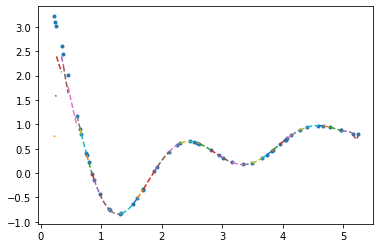

In [120]:
plt.plot(dataX, dataY, '.')

# Print every poly  
for p in range(1, n):
    d = np.linspace(dataX[ p-1 ], dataX[ p ], 100)
    plt.plot(d, Poly(d, p), '--')
    
plt.show()